# 總市值前100名的虛擬貨幣

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [2]:
# 將爬蟲偽裝成Browser
url = "https://www.coingecko.com/zh-tw"
url_headers = {"user-agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/72.0.3626.119 Safari/537.36"}
r = requests.get(url, headers = url_headers)
print(r.status_code)  # status code為200，表示網頁回應正確

200


In [3]:
# 剖析網頁元素，將我們要抓取的資料取出
soup = BeautifulSoup(r.text, "lxml")
table = soup.find(attrs={"class":"sort table mb-0 text-sm text-lg-normal table-scrollable"})

In [4]:
# 將tag <tr>的資料出
trs = table.tbody.find_all("tr")
df = []
columnName = ['#','貨幣','代號', '匯率','1小時','24小時','7天','24小時交易量','總市值']
# 以form迴圈將資料逐筆取出
for tr in trs:
    tds = tr.find_all("td")
    tmp = []
    for idx in range(10):
        if (idx == 2):
            tmp.append(tds[idx].find_all("span")[1].string)
            tmp.append(tds[idx].find_all("span")[2].string)  
        elif (idx != 0 and idx != 8):
            tmp.append(tds[idx].span.string)     
    df.append(tmp)    
# 將資料轉為DataFrame，秀出前10筆
df = pd.DataFrame(df, columns = columnName)
print("總筆數:", len(df))
df.head(10)    # 顯示前10筆

總筆數: 100


,#,貨幣,代號,匯率,1小時,24小時,7天,24小時交易量,總市值
0,1,比特幣,BTC,"$9,765.58",0.40%,-3.1%,-8.2%,"$20,918,783,698","$174,424,356,582"
1,2,以太幣,ETH,$215.64,0.49%,-2.6%,-4.7%,"$7,799,815,384","$23,132,726,218"
2,3,瑞波幣,XRP,$0.311579,0.46%,-1.6%,-3.4%,"$1,795,183,712","$13,362,287,120"
3,4,萊特幣,LTC,$92.18,0.83%,-2.2%,-9.0%,"$2,624,293,047","$5,803,828,736"
4,5,比特現金,BCH,$311.69,3.9%,1.8%,-1.0%,"$1,710,679,892","$5,624,911,620"
5,6,柚子幣,EOS,$4.55,1.4%,0.28%,11%,"$2,910,925,700","$4,647,973,962"
6,7,幣安幣,BNB,$28.55,0.61%,-2.7%,-1.9%,"$215,787,216","$4,449,119,860"
7,8,泰達幣,USDT,$0.999515,-0.18%,-0.12%,-0.16%,"$33,689,037,616","$3,562,959,586"
8,9,Bitcoin SV,BSV,$161.20,2.4%,-2.7%,19%,"$626,868,543","$2,894,025,375"
9,10,艾達幣,ADA,$0.05800820,1.2%,-1.3%,-1.2%,"$330,292,878","$1,808,460,012"


In [5]:
df_10 = df.head(10)
coin = df_10['代號']
rate = df_10['匯率']
rate = [float(r.replace("$", "").replace(",","")) for r in rate]

In [6]:
import matplotlib as mpl
import matplotlib.pyplot as plt

In [7]:
mpl.rcParams["font.sans-serif"] = ["Microsoft JhengHei"]
mpl.rcParams["axes.unicode_minus"] = False

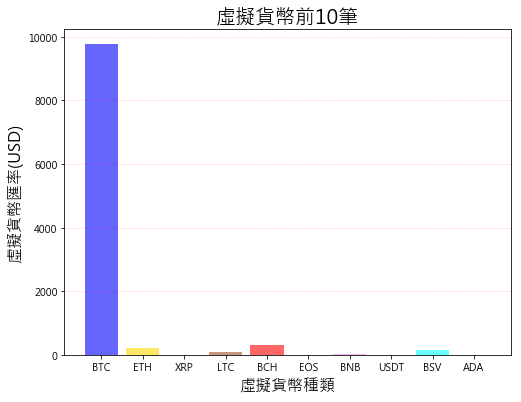

In [8]:
# plot
plt.figure(figsize=(8, 6))

colors = ["blue", "gold", "darkgreen", "sienna", "red", "m", "violet", "blueviolet", "cyan", "cyan"]

plt.bar(coin, rate, align="center", color=colors, tick_label=coin, alpha=0.6)

plt.title("虛擬貨幣前10筆", fontsize=20)
plt.xlabel("虛擬貨幣種類", fontsize=16)
plt.ylabel("虛擬貨幣匯率(USD)", fontsize=16)

plt.grid(True, axis="y", ls=":", color="r", alpha=0.3)

plt.show()

In [9]:
# 取出特別關注之幣別
df.index = df['代號']
idx = ['BTC', 'ETH', 'XRP','LTC', 'MIOTA']
df.loc[idx]

,#,貨幣,代號,匯率,1小時,24小時,7天,24小時交易量,總市值
代號,,,,,,,,,
BTC,1,比特幣,BTC,"$9,765.58",0.40%,-3.1%,-8.2%,"$20,918,783,698","$174,424,356,582"
ETH,2,以太幣,ETH,$215.64,0.49%,-2.6%,-4.7%,"$7,799,815,384","$23,132,726,218"
XRP,3,瑞波幣,XRP,$0.311579,0.46%,-1.6%,-3.4%,"$1,795,183,712","$13,362,287,120"
LTC,4,萊特幣,LTC,$92.18,0.83%,-2.2%,-9.0%,"$2,624,293,047","$5,803,828,736"
MIOTA,20,埃歐塔,MIOTA,$0.300467,0.73%,-1.3%,-1.9%,"$12,839,242","$835,794,292"


In [10]:
coin = df.loc[idx]['代號']
rate = df.loc[idx]['匯率']
rate = [float(r.replace("$", "").replace(",","")) for r in rate]

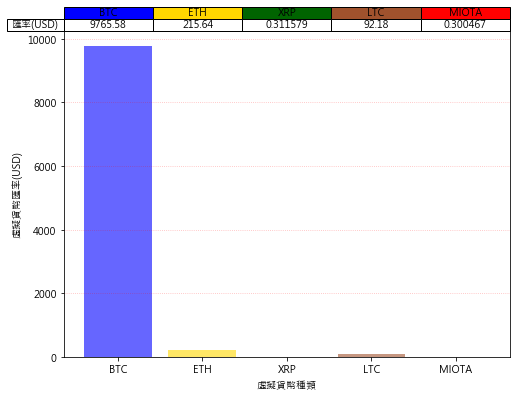

In [18]:
# plot
plt.figure(figsize=(8, 6))

colors = ["blue", "gold", "darkgreen", "sienna", "red"]

plt.bar(coin, rate, align="center", color=colors, tick_label=coin, alpha=0.6)

plt.xlabel("虛擬貨幣種類")
plt.ylabel("虛擬貨幣匯率(USD)")

plt.grid(True, axis="y", ls=":", color="r", alpha=0.3)

# add table
colLabels = ["BTC", "ETH", "XRP", "LTC", "MIOTA"]
rowLabels = ["匯率(USD)"]
rateValues = [rate]
plt.table(cellText=rateValues,
         cellLoc="center",
         colLabels=colLabels,
         colColours=colors,
         rowLabels=rowLabels,
         rowLoc="center",
         loc="top",
         fontsize=16)

plt.show()